# Programming Exercise 3: Multi-Class Classification

We'll be using the output from the previous exercise. Logistic Regression with regularizaton

In [1]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from logisticRegression import *

# Optimization module in scipy
from scipy import optimize

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Loading and parsing data from a Matlab file

In [2]:
data = loadmat('ex3data1.mat')
# This loads all the information on a dictonary
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}


In [3]:
# Looking at the dictionary keys
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
# We can access the contents of each dictionary key as an array
data['__header__']

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011'

In [5]:
# Having a look at the dataset
data['X'], data['y']

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8))

In [6]:
# Convert the data into a numpy array
X = data['X']
y = data['y'].flatten()

In [14]:
X.shape

(5000, 400)

y should be made of values from 0-9. However, as matlab does not have 0 index, the value is replaced by 10.
We'll normalize the 10 value back to 0, so it matches the 0 digit.

In [8]:
y = np.where(y == 10, 0, y)
# Another way to do it
# y[y == 10] = 0

In [9]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [10]:
# m = number of training examples
# n = number of features
(m,n) = X.shape

## Visualizing the data

We'll visualize 100 random data points from the training set.

In [21]:
# We get a 100 random datapoints. First we get a 100 indices out of m
rand_indices = np.random.choice(m, 100, replace=False)
# Second, we load these random vectors in the sel array
sel = X[rand_indices, :]

<function matplotlib.pyplot.show(close=None, block=None)>

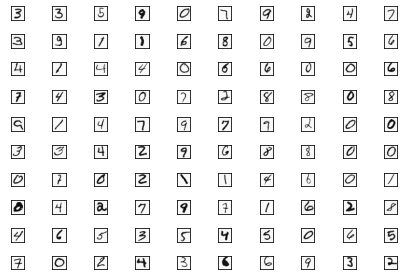

In [23]:
fig, ax = plt.subplots(nrows=10, ncols=10, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(100):
    img = sel[i].reshape(20,20).T
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show